<a href="https://colab.research.google.com/github/alloysArtifexLabs/IMAGE-AI/blob/image-classifier/IMAGE_CLASSIFICATION_ON_CIFAR10_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.3512 - loss: 1.7525 - val_accuracy: 0.5683 - val_loss: 1.2157
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5763 - loss: 1.1879 - val_accuracy: 0.6283 - val_loss: 1.0446
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6400 - loss: 1.0178 - val_accuracy: 0.6573 - val_loss: 0.9753
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6766 - loss: 0.9189 - val_accuracy: 0.6741 - val_loss: 0.9383
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7022 - loss: 0.8521 - val_accuracy: 0.6856 - val_loss: 0.9218
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7256 - loss: 0.7898 - val_accuracy: 0.6885 - val_loss: 0.9407
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7397 - loss: 0.7432 - val_accuracy: 0.6888 - val_loss: 0.9508
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7588 - loss: 0.6970 


Test accuracy: 0.6862

Model saved to 'cifar10_cnn_model.h5'.
Model loaded from 'cifar10_cnn_model.h5'.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


<ipython-input-1-61cd7c3f00eb>:74: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  true_label = class_names[int(y_test[i])]


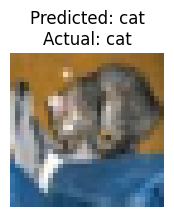

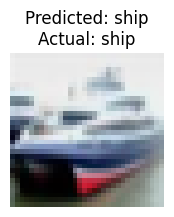

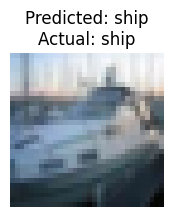

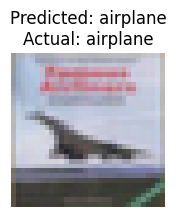

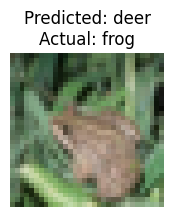

In [1]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# For reproducibility (optional)
tf.random.set_seed(42)

# Load the CIFAR-10 dataset
# x_train, x_test: images; y_train, y_test: labels
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Preprocess the data by normalizing pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# Build a Convolutional Neural Network (CNN) model
model = tf.keras.models.Sequential([
    # First convolutional layer; input shape inferred from training data
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=x_train.shape[1:]),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Second convolutional layer
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Third convolutional layer
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten the output from convolutional layers to feed into the dense layers
    tf.keras.layers.Flatten(),

    # Fully connected layer
    tf.keras.layers.Dense(64, activation='relu'),

    # Output layer with 10 units (one per CIFAR-10 class). Note: No activation function because we'll use logits.
    tf.keras.layers.Dense(10)
])

# Compile the model using Adam optimizer and SparseCategoricalCrossentropy loss.
# Using from_logits=True because the model outputs raw logits.
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model for at least 10 epochs. Validation is done on the test set.
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model on the test set and print the test accuracy
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

# Save the trained model to a file in .h5 format
model.save('cifar10_cnn_model.h5')
print("\nModel saved to 'cifar10_cnn_model.h5'.")

# Load the saved model from file
loaded_model = tf.keras.models.load_model('cifar10_cnn_model.h5')
print("Model loaded from 'cifar10_cnn_model.h5'.")

# Optional: Basic inference on a few test images
# Define CIFAR-10 class names for readability
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Make predictions on the first 5 test images
predictions = loaded_model.predict(x_test[:5])
predicted_labels = np.argmax(predictions, axis=1)

# Plot the test images along with predicted and actual labels
for i in range(5):
    plt.figure(figsize=(2,2))
    plt.imshow(x_test[i])
    true_label = class_names[int(y_test[i])]
    pred_label = class_names[predicted_labels[i]]
    plt.title(f'Predicted: {pred_label}\nActual: {true_label}')
    plt.axis('off')
    plt.show()
